**Name:** Airyll Sanchez

**Date:** September 17, 2025

## LABORATOR TASK # 4

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

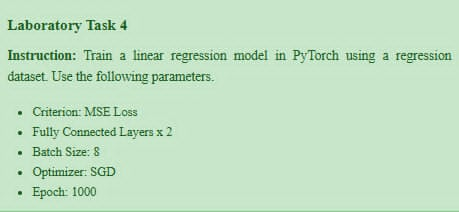

In [2]:
#BATCH_SIZE = 8
EPOCHS = 1000
LEARNING_RATE = 0.01 # Standard value for SGD; not specified, so we choose one.
INPUT_SIZE = 1       # We'll use a single feature for simplicity
HIDDEN_SIZE = 32     # A reasonable size for the hidden layer
OUTPUT_SIZE = 1      # For a linear regression task

# Creating a simple dataset: y = 2x + 1 + noise
N_SAMPLES = 100
X_numpy = torch.randn(N_SAMPLES, INPUT_SIZE) * 10 # 100 samples, 1 feature
y_numpy = 2 * X_numpy + 1 + torch.randn(N_SAMPLES, OUTPUT_SIZE) * 2 # Linear + noise

# Convert to PyTorch Tensors
X_tensor = X_numpy.float()
y_tensor = y_numpy.float()

# Create Dataset and DataLoader
dataset = TensorDataset(X_tensor, y_tensor)
data_loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

print(f"Dataset size: {len(dataset)} samples")

NameError: name 'BATCH_SIZE' is not defined

In [7]:
class SimpleLinearModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleLinearModel, self).__init__()
        # Layer 1: Input to Hidden
        self.fc1 = nn.Linear(input_size, hidden_size)
        # Layer 2: Hidden to Output
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x)) 
        x = self.fc2(x) # Final output layer (no activation for regression)
        return x

# Instantiate the model
model = SimpleLinearModel(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE)
print("\nModel Architecture:")
print(model)


Model Architecture:
SimpleLinearModel(
  (fc1): Linear(in_features=1, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=1, bias=True)
)


In [8]:
# Criterion: MSE Loss
criterion = nn.MSELoss()

# Optimizer: SGD (Stochastic Gradient Descent)
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)

In [9]:
#Training Loop
print("\nStarting Training...")
for epoch in range(EPOCHS):
    total_loss = 0.0
    
    # Iterate over the data in batches
    for inputs, targets in data_loader:
        
        # 1. Zero the gradients
        optimizer.zero_grad()
        
        # 2. Forward pass: Compute predicted output
        outputs = model(inputs)
        
        # 3. Calculate the loss (MSE)
        loss = criterion(outputs, targets)
        
        # 4. Backward pass: Compute gradient of the loss w.r.t. model parameters
        loss.backward()
        
        # 5. Update weights: Optimizer performs a single optimization step (SGD)
        optimizer.step()
        
        total_loss += loss.item()

    # Calculate average loss for the epoch
    avg_loss = total_loss / len(data_loader)
    
    # Print training statistics every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{EPOCHS}], Loss: {avg_loss:.4f}')

print("Training finished.")


Starting Training...
Epoch [100/1000], Loss: nan
Epoch [200/1000], Loss: nan
Epoch [300/1000], Loss: nan
Epoch [400/1000], Loss: nan
Epoch [500/1000], Loss: nan
Epoch [600/1000], Loss: nan
Epoch [700/1000], Loss: nan
Epoch [800/1000], Loss: nan
Epoch [900/1000], Loss: nan
Epoch [1000/1000], Loss: nan
Training finished.


In [10]:
#  Verification
# Check the final prediction on a sample data point
sample_input = torch.tensor([[5.0]]).float()
model.eval() # Set model to evaluation mode
with torch.no_grad():
    prediction = model(sample_input)

print(f"\nExample Input: {sample_input.item():.2f}")
print(f"Prediction (y_hat): {prediction.item():.2f}")
# For the generated dataset, the target should be around 2*5 + 1 = 11.


Example Input: 5.00
Prediction (y_hat): nan
